In [30]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv', index_col=0)

In [3]:
dataset.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
Year,,,,,,,,,,,,,,,,
2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345


In [4]:
dataset.shape 

(1000, 16)

In [5]:
# Extract the X and Y variables from the dataset 
X = dataset.drop(columns=["BiodiversityHealthIndex"])
y = "BiodiversityHealthIndex"

In [17]:
# Scaling the Data using Standardisation 
scaler = StandardScaler() 

# Scaling the predictors 
X_scaled = scaler.fit_transform(X)

# Rebuilding the scaled values back to a dataframe 
X_standardized = pd.DataFrame(data=X_scaled, columns=X.columns) 
X_standardized.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,-0.509823,0.915895,0.532798,0.967295,-0.129430,-1.297085,0.017923,0.689812,-0.641157,-1.290990,-0.930835,-1.237558,-1.131411,1.494660,-0.811078
1,-1.261473,-1.159761,0.479063,1.382383,-1.098165,1.226669,-1.649745,0.655167,0.539995,0.207271,0.470716,-0.670150,0.305779,-0.107952,0.797582
2,-1.363971,-1.409483,1.389846,0.206299,0.320340,-0.529103,-0.877370,0.759101,1.165311,-0.473757,-0.110415,1.006319,1.598836,-1.017291,-1.518029
3,-0.475658,0.746916,0.684528,0.828932,1.323673,1.653728,1.188117,0.481943,1.165311,1.535274,0.368164,-1.360736,0.001642,-0.978326,-1.249998
4,-0.885648,1.230038,-0.213905,1.105658,1.323673,1.445945,-0.439815,-1.319584,-1.787570,1.160709,0.402348,1.675792,-0.977884,0.832482,1.077254


<Axes: xlabel='SoilQualityIndex', ylabel='Count'>

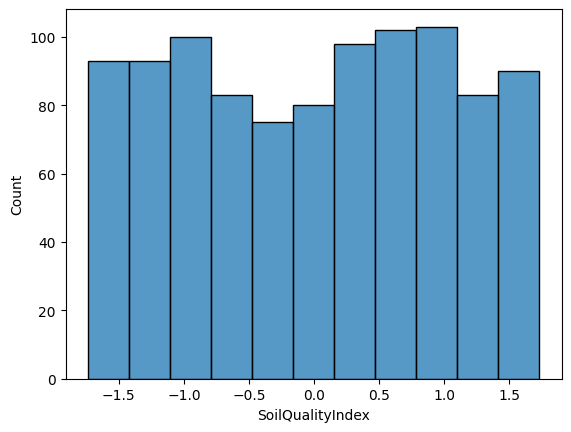

In [7]:
# Confirming Standardization (Whether values have been centered around mu=0)
sns.histplot(X_standardized.SoilQualityIndex)

In [8]:
X_standardized.describe()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.083578e-16,-8.881784e-17,1.314504e-16,-4.196643e-17,1.421085e-17,-6.750156e-17,7.105427e-18,4.440892e-17,-9.592327e-17,9.592327e-17,1.207923e-16,9.592327e-17,1.882938e-16,-1.136868e-16,-7.727152e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.705630e+00,-1.725806e+00,-1.795069e+00,-1.730781e+00,-1.720924e+00,-1.709538e+00,-1.704003e+00,-1.735322e+00,-1.787570e+00,-1.733658e+00,-1.682888e+00,-1.731151e+00,-1.707504e+00,-1.736269e+00,-1.757461e+00
25%,-8.514823e-01,-8.912860e-01,-8.450721e-01,-8.314224e-01,-8.905791e-01,-8.492904e-01,-8.782381e-01,-9.038472e-01,-8.148561e-01,-8.823734e-01,-8.966512e-01,-8.379231e-01,-8.344879e-01,-8.485550e-01,-8.493547e-01
50%,-3.150095e-02,1.028490e-02,3.910839e-02,-7.042670e-02,-2.563689e-02,-6.185075e-02,1.125833e-02,3.156138e-02,5.363821e-02,3.701385e-02,-7.862363e-03,-6.546521e-03,-3.394618e-02,1.002191e-02,2.980044e-02
75%,8.568122e-01,8.652407e-01,8.688085e-01,8.981133e-01,9.085007e-01,8.591949e-01,8.821350e-01,8.630357e-01,8.526530e-01,8.968111e-01,8.809265e-01,8.322294e-01,8.537778e-01,8.711141e-01,8.627801e-01
max,1.710959e+00,1.766578e+00,1.715789e+00,1.728291e+00,1.738845e+00,1.747007e+00,1.729290e+00,1.729155e+00,1.686408e+00,1.671480e+00,1.735531e+00,1.748632e+00,1.755826e+00,1.730748e+00,1.739688e+00


In [9]:
# Implementing MinMaxScaler() 
scaler_2 = MinMaxScaler() 

In [10]:
X_scaled_2 = scaler_2.fit_transform(X) 
X_standardized_2 = pd.DataFrame(data=X_scaled_2, columns=X.columns)

In [11]:
X_standardized_2.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,0.35,0.756418,0.663048,0.78,0.46,0.119325,0.501538,0.70,0.33,0.13,0.22,0.141846,0.166341,0.931904,0.270616
1,0.13,0.162080,0.647743,0.90,0.18,0.849463,0.015804,0.69,0.67,0.57,0.63,0.304904,0.581314,0.469659,0.730607
2,0.10,0.090575,0.907161,0.56,0.59,0.341507,0.240770,0.72,0.85,0.37,0.46,0.786679,0.954671,0.207377,0.068465
3,0.36,0.708033,0.706265,0.74,0.88,0.973014,0.842375,0.64,0.85,0.96,0.60,0.106448,0.493498,0.218615,0.145108
4,0.24,0.846369,0.450364,0.82,0.88,0.912901,0.368214,0.12,0.00,0.85,0.61,0.979068,0.210670,0.740911,0.810579


In [12]:
X_standardized_2.describe()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.499220,0.494163,0.511291,0.50036,0.497410,0.494580,0.496317,0.500890,0.514560,0.509130,0.492300,0.497488,0.493024,0.500796,0.502541
std,0.292836,0.286481,0.284973,0.28924,0.289181,0.289451,0.291411,0.288788,0.287999,0.293821,0.292679,0.287518,0.288884,0.288577,0.286090
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.238954,0.270588,0.26000,0.240000,0.248875,0.240517,0.240000,0.280000,0.250000,0.230000,0.256691,0.252074,0.256045,0.259670
50%,0.490000,0.497108,0.522430,0.48000,0.490000,0.476686,0.499597,0.510000,0.530000,0.520000,0.490000,0.495607,0.483222,0.503687,0.511062
75%,0.750000,0.741913,0.758754,0.76000,0.760000,0.743150,0.753253,0.750000,0.760000,0.772500,0.750000,0.736650,0.739543,0.752054,0.749251
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='SoilQualityIndex', ylabel='Count'>

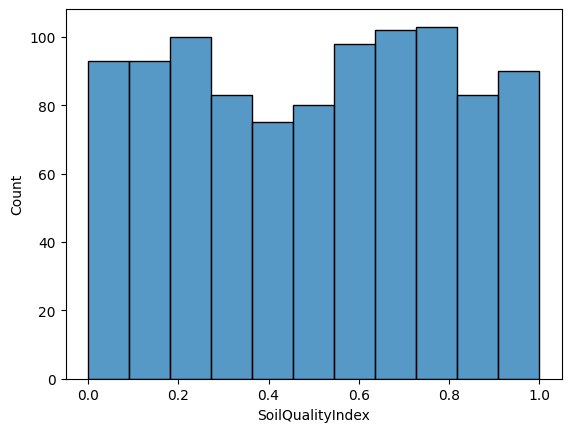

In [13]:
sns.histplot(data=X_standardized_2.SoilQualityIndex)

In [14]:
# One of the downsides of the MinMaxScaler is that it does not handle the outliers very well.
# Since were are trying to put the values into a scaler between 0-1, the data will happen to be 
# squished as before. 

# For example, we have 99 values between 0-40. Then onother value which is 99.
# The resulting scaler after minmax scaling will put values between 0-40 at around 0.4. 
# As a result, the data will be just as squished as before.

In [19]:
# Implementing the Ridge Regularisation 
from sklearn.linear_model import Ridge, LinearRegression 
from sklearn.model_selection import train_test_split

In [18]:
X_standardized.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,-0.509823,0.915895,0.532798,0.967295,-0.129430,-1.297085,0.017923,0.689812,-0.641157,-1.290990,-0.930835,-1.237558,-1.131411,1.494660,-0.811078
1,-1.261473,-1.159761,0.479063,1.382383,-1.098165,1.226669,-1.649745,0.655167,0.539995,0.207271,0.470716,-0.670150,0.305779,-0.107952,0.797582
2,-1.363971,-1.409483,1.389846,0.206299,0.320340,-0.529103,-0.877370,0.759101,1.165311,-0.473757,-0.110415,1.006319,1.598836,-1.017291,-1.518029
3,-0.475658,0.746916,0.684528,0.828932,1.323673,1.653728,1.188117,0.481943,1.165311,1.535274,0.368164,-1.360736,0.001642,-0.978326,-1.249998
4,-0.885648,1.230038,-0.213905,1.105658,1.323673,1.445945,-0.439815,-1.319584,-1.787570,1.160709,0.402348,1.675792,-0.977884,0.832482,1.077254


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, dataset[y], test_size=0.2, shuffle=True)

In [21]:
ridge = Ridge(alpha=1)

In [22]:
ridge.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [25]:
beta0 = ridge.intercept_ 
coeff = ridge.coef_


beta0, coeff

(np.float64(0.49743463139770444),
 array([ 0.01506791, -0.0054356 ,  0.00590534,  0.00597651, -0.02043204,
        -0.02119867, -0.01749506,  0.00408591, -0.00114211, -0.00782357,
        -0.01142694,  0.00694132,  0.00251874,  0.00942503, -0.00262158]))

In [29]:
pd.DataFrame(coeff, index=X.columns, columns=["Coefficient"])

,Coefficient
WaterQualityIndex,0.015068
ClimateChangeImpactScore,-0.005436
LandUseChange,0.005905
InvasiveSpeciesCount,0.005977
ConservationFunding,-0.020432
EcoTourismImpact,-0.021199
ForestCoverChange,-0.017495
SoilQualityIndex,0.004086
WaterUsage,-0.001142
RenewableEnergyUsage,-0.007824


In [32]:
linear_model = LinearRegression().fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge.predict(X_test) 

print(f"Ridge {metrics.mean_squared_error(y_test, ridge_predictions)}\n Linear {metrics.mean_squared_error(y_test, linear_predictions)}")

Ridge 0.0840710234479202
 Linear 0.08407633572651786
